In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [42]:
def mergeCSV(file_list):
    df_merge=pd.DataFrame()
    for file in file_list:
        df=pd.read_csv(file, header=None)
        df_merge=pd.concat([df, df_merge], ignore_index=True, sort=False)
    print(df_merge.shape)
    
    return df_merge


file_list=[]
for filepath in glob.iglob(r'C:/Users/antonebert/Desktop/WS2021 Programing/MADI/Activity Recognition from Single Chest-Mounted Accelerometer/*.csv'):
    file_list.append(filepath)

df_merged_csv=mergeCSV(file_list)

(1926896, 5)


In [43]:
df=df_merged_csv.drop(columns=[0])
df.columns=['x','y','z','label']
df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
print(df.shape)


(1923177, 4)


## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

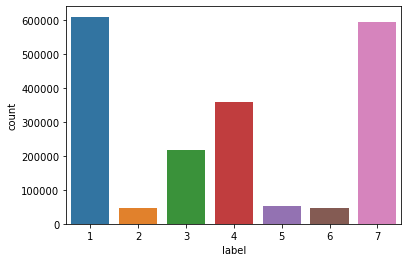

In [44]:
sns.countplot(x = 'label', data=df)

In [45]:
df.head(-5)

x     y     z  label
0        2287  2948  2189      1
1        2249  2677  2046      1
2        2270  2568  2005      1
3        2222  2565  2003      1
4        2235  2571  2074      1
...       ...   ...   ...    ...
1926885  1931  2383  2076      7
1926886  1927  2383  2079      7
1926887  1931  2388  2076      7
1926888  1932  2383  2072      7
1926889  1931  2386  2073      7

[1923172 rows x 4 columns]

In [46]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [47]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [48]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [49]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=7)

C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 784, i

C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\antonebert\anaconda3\envs\madi4\lib\site-packages\joblib\parallel.py", line 784, i

In [50]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[178087   2469   2699   7451    459    259   9418]
 [  5759   3032    891   3388     94     49   2442]
 [  3844    524  30914  16634   1994   1400  16400]
 [  7726    648   7471  85144   1153    693  14923]
 [  1350     82   3121   6837   2208    519   3031]
 [   625     77   1868   3150    567   3372   6133]
 [  8637    936  10133  15453   1144   2779 156662]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.86      0.89      0.88    200842
           2       0.39      0.19      0.26     15655
           3       0.54      0.43      0.48     71710
           4       0.62      0.72      0.67    117758
           5       0.29      0.13      0.18     17148
           6       0.37      0.21      0.27     15792
           7       0.75      0.80      0.77    195744

    accuracy                           0.72    634649
   macro avg       0.55      0.48      0.50    634649
weighted avg       0.71      0.72   

Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing